In [1]:
import pandas as pd
pd.set_option('display.max_columns', 200)

import matplotlib.pyplot as plt
plt.style.use('bmh') # available styles `plt.style.available`

import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
#plt.style.available

In [3]:
df = pd.read_pickle('../data/interim/database-2024-08-11-interim.pkl')

In [4]:
df.head()

,url,name,description,free,year_established,designer,tee_type,basket_type,water_in_play,basket_number,number_of_holes,sse,par,course_condition,length_metric,length_imperial,Terrain,Woods,links,is_extinct,local_directions,Rounds Recorded & Average Score,street_address,town,region,postal_code,country,latitude,longitude,ratingValue,rating_max,rating_min,rating_count,camping,pet_friendly,has_restrooms,on_ball_golf_course,cart_friendly,multiple_tees,multiple_pins
1,https://www.dgcoursereview.com/course.php?id=1,Prompton State Park,"A very scenic, mostly open course overlooking ...",True,1997,John Harvey Dave Harvey,Concrete,DISCatcher,5,18,18,"[46.8, 54.3]","[57, 67]",None,"[1787, 2460]","[5864, 8071]",Moderately Hilly,Lightly Wooded,[http://www.dcnr.state.pa.us/stateparks/findap...,0,"From I-81, take Rte. 6 east, from I-84, take R...","{'Total': '101 / 62', '#FFFF00': '77 / 60', '#...",[unknown],Honesdale,Pennsylvania,18456,United States,41.591367,-75.330167,3.95,5,0,20,true,true,false,false,true,No,Yes
2,https://www.dgcoursereview.com/course.php?id=2,Ellison Park - Old Layout,The Ellison Park Disc Golf Course is located o...,True,1989,"Royce Racinowski, Jim Palmeri &amp; Jamie Moldt",Rubber,Mach 3,None,18,18,[52.5],[57],None,[1900],[6234],Very Hilly,Moderately Wooded,"[http://www.discgolfrochester.com, http://www....",1,"From I-490 south of Rochester, exit north on H...","{'Total': '417 / 63', '#0000CC': '383 / 63'}",[unknown],Rochester,New York,14610,United States,43.153154,-77.527428,3.47,5,0,54,false,true,false,false,false,No,No
3,https://www.dgcoursereview.com/course.php?id=3,Chili DGC,Located southwest of Rochester N.Y. in the Tow...,True,1995,None,Concrete,Dynamic Veteran,6,18,18,"[43, 48.9, 55.9]","[57, 58, 58]",Perfect,"[1211, 2147]","[3973, 7045]",Mostly Flat,Lightly Wooded,"[http://www.discgolfrochester.com, http://nefa...",0,"I-490 to Exit 5, Chili Center, Rte. 386 south ...","{'Total': '789 / 70', '#0000CC': '20 / 70', '#...",400 Scottsville Chili Rd.,Chili,New York,14428,United States,43.07777,-77.766098,3.9,5,0,70,false,true,true,false,true,Yes,No
4,https://www.dgcoursereview.com/course.php?id=4,Churchville Park,Located west of Rochester N.Y. in the town of ...,True,2003,None,Rubber,DISCatcher,1,19,19,"[44, 47.3]","[65, 60]",Good,"[1344, 1614]","[4408, 5296]",Mostly Flat,Lightly Wooded,"[http://www.discgolfrochester.com, https://map...",0,Take I-490 E/W to Churchville exit (Exit 3). T...,"{'Total': '215 / 64', '#0000CC': '13 / 65', '#...",[unknown],Churchville,New York,14428,United States,43.113819,-77.883698,2.57,5,0,21,false,true,true,false,true,Yes,No
5,https://www.dgcoursereview.com/course.php?id=5,Sawyer Park,Small scenic park with creek running throughou...,True,2006,None,Dirt,DISCatcher,3,9,9,[20.5],[27],None,"[576, 642]","[1890, 2105]",Mostly Flat,Heavily Wooded,"[http://www.discgolfrochester.com, http://nefa...",0,"Rte. 490 to Rte. 390 N. Exit Vintage Ln., turn...","{'Total': '64 / 28', '#FFFFFF': '53 / 27'}",[unknown],Greece,New York,14616,United States,43.248798,-77.693089,1.98,5,0,30,false,true,false,false,true,No,No


In [5]:
df.columns

Index(['url', 'name', 'description', 'free', 'year_established', 'designer',
       'tee_type', 'basket_type', 'water_in_play', 'basket_number',
       'number_of_holes', 'sse', 'par', 'course_condition', 'length_metric',
       'length_imperial', 'Terrain', 'Woods', 'links', 'is_extinct',
       'local_directions', 'Rounds Recorded & Average Score', 'street_address',
       'town', 'region', 'postal_code', 'country', 'latitude', 'longitude',
       'ratingValue', 'rating_max', 'rating_min', 'rating_count', 'camping',
       'pet_friendly', 'has_restrooms', 'on_ball_golf_course', 'cart_friendly',
       'multiple_tees', 'multiple_pins'],
      dtype='object')

In [6]:
df.dtypes

url                                object
name                               object
description                        object
free                               object
year_established                   object
designer                           object
tee_type                           object
basket_type                        object
water_in_play                      object
basket_number                      object
number_of_holes                    object
sse                                object
par                                object
course_condition                   object
length_metric                      object
length_imperial                    object
Terrain                            object
Woods                              object
links                              object
is_extinct                         object
local_directions                   object
Rounds Recorded & Average Score    object
street_address                     object
town                              

In [7]:
# Rename some columns
#df = df.rename(columns={
                    #'url', 'name', 'description', 
                   'isAccessibleForFree':'free', 'Year established':'year_established',
                   'Designer':'designer', 'Tee Type':'tee_type', 'Hole Type':'basket_type', 
                    'Water in play':'water_in_play', 'Baskets': 'basket_number',
                    'Holes':'number_of_holes', 'SSE':'sse', 'Par Info':'par', 'Course conditions':'course_condition', 
                    'Metric length':'length_metric', 'Imperial length':'length_imperial', 'Links':'links', 
                    'Extinct':'is_extinct', 'Local Directions':'local_directions',
                   #'Rounds Recorded & Average Score', '@type', 
                    'streetAddress':'street_address',
                   'addressLocality':'town', 'addressRegion':'region', 'postalCode':'postal_code', 
                    'addressCountry':'country',
                   #'latitude', 'longitude', 
                    'rating':"rating_avg", 'bestRating':'rating_max', 'worstRating':'rating_min',
                   'ratingCount':'rating_count', 
                    'Disc golf course':'disc_golf_course', 'Camping':'camping', 'Pet-Friendly':'pet_friendly',
                   'Restrooms':'has_restrooms', 'On ball golf':'on_ball_golf_course', 'Cart-Friendly':'cart_friendly', 
                    #'multiple_tees', 'multiple_pins'
                  }).copy()

df.head()

,url,name,description,free,year_established,designer,tee_type,basket_type,water_in_play,basket_number,number_of_holes,sse,par,course_condition,length_metric,length_imperial,Terrain,Woods,links,is_extinct,local_directions,Rounds Recorded & Average Score,street_address,town,region,postal_code,country,latitude,longitude,ratingValue,rating_max,rating_min,rating_count,camping,pet_friendly,has_restrooms,on_ball_golf_course,cart_friendly,multiple_tees,multiple_pins
1,https://www.dgcoursereview.com/course.php?id=1,Prompton State Park,"A very scenic, mostly open course overlooking ...",True,1997,John Harvey Dave Harvey,Concrete,DISCatcher,5,18,18,"[46.8, 54.3]","[57, 67]",None,"[1787, 2460]","[5864, 8071]",Moderately Hilly,Lightly Wooded,[http://www.dcnr.state.pa.us/stateparks/findap...,0,"From I-81, take Rte. 6 east, from I-84, take R...","{'Total': '101 / 62', '#FFFF00': '77 / 60', '#...",[unknown],Honesdale,Pennsylvania,18456,United States,41.591367,-75.330167,3.95,5,0,20,true,true,false,false,true,No,Yes
2,https://www.dgcoursereview.com/course.php?id=2,Ellison Park - Old Layout,The Ellison Park Disc Golf Course is located o...,True,1989,"Royce Racinowski, Jim Palmeri &amp; Jamie Moldt",Rubber,Mach 3,None,18,18,[52.5],[57],None,[1900],[6234],Very Hilly,Moderately Wooded,"[http://www.discgolfrochester.com, http://www....",1,"From I-490 south of Rochester, exit north on H...","{'Total': '417 / 63', '#0000CC': '383 / 63'}",[unknown],Rochester,New York,14610,United States,43.153154,-77.527428,3.47,5,0,54,false,true,false,false,false,No,No
3,https://www.dgcoursereview.com/course.php?id=3,Chili DGC,Located southwest of Rochester N.Y. in the Tow...,True,1995,None,Concrete,Dynamic Veteran,6,18,18,"[43, 48.9, 55.9]","[57, 58, 58]",Perfect,"[1211, 2147]","[3973, 7045]",Mostly Flat,Lightly Wooded,"[http://www.discgolfrochester.com, http://nefa...",0,"I-490 to Exit 5, Chili Center, Rte. 386 south ...","{'Total': '789 / 70', '#0000CC': '20 / 70', '#...",400 Scottsville Chili Rd.,Chili,New York,14428,United States,43.07777,-77.766098,3.9,5,0,70,false,true,true,false,true,Yes,No
4,https://www.dgcoursereview.com/course.php?id=4,Churchville Park,Located west of Rochester N.Y. in the town of ...,True,2003,None,Rubber,DISCatcher,1,19,19,"[44, 47.3]","[65, 60]",Good,"[1344, 1614]","[4408, 5296]",Mostly Flat,Lightly Wooded,"[http://www.discgolfrochester.com, https://map...",0,Take I-490 E/W to Churchville exit (Exit 3). T...,"{'Total': '215 / 64', '#0000CC': '13 / 65', '#...",[unknown],Churchville,New York,14428,United States,43.113819,-77.883698,2.57,5,0,21,false,true,true,false,true,Yes,No
5,https://www.dgcoursereview.com/course.php?id=5,Sawyer Park,Small scenic park with creek running throughou...,True,2006,None,Dirt,DISCatcher,3,9,9,[20.5],[27],None,"[576, 642]","[1890, 2105]",Mostly Flat,Heavily Wooded,"[http://www.discgolfrochester.com, http://nefa...",0,"Rte. 490 to Rte. 390 N. Exit Vintage Ln., turn...","{'Total': '64 / 28', '#FFFFFF': '53 / 27'}",[unknown],Greece,New York,14616,United States,43.248798,-77.693089,1.98,5,0,30,false,true,false,false,true,No,No


In [8]:
# Remove empty rows; use 'url' feature to determine
#df = df[~df['url'].isnull()].copy()
#df.shape

In [9]:
# Remove extinct courses
#df = df[df['is_extinct'] == 0].copy()
#df.shape

In [10]:
column_names = df.columns.to_list() # save to list

In [11]:
df.head()

,url,name,description,free,year_established,designer,tee_type,basket_type,water_in_play,basket_number,number_of_holes,sse,par,course_condition,length_metric,length_imperial,Terrain,Woods,links,is_extinct,local_directions,Rounds Recorded & Average Score,street_address,town,region,postal_code,country,latitude,longitude,ratingValue,rating_max,rating_min,rating_count,camping,pet_friendly,has_restrooms,on_ball_golf_course,cart_friendly,multiple_tees,multiple_pins
1,https://www.dgcoursereview.com/course.php?id=1,Prompton State Park,"A very scenic, mostly open course overlooking ...",True,1997,John Harvey Dave Harvey,Concrete,DISCatcher,5,18,18,"[46.8, 54.3]","[57, 67]",None,"[1787, 2460]","[5864, 8071]",Moderately Hilly,Lightly Wooded,[http://www.dcnr.state.pa.us/stateparks/findap...,0,"From I-81, take Rte. 6 east, from I-84, take R...","{'Total': '101 / 62', '#FFFF00': '77 / 60', '#...",[unknown],Honesdale,Pennsylvania,18456,United States,41.591367,-75.330167,3.95,5,0,20,true,true,false,false,true,No,Yes
2,https://www.dgcoursereview.com/course.php?id=2,Ellison Park - Old Layout,The Ellison Park Disc Golf Course is located o...,True,1989,"Royce Racinowski, Jim Palmeri &amp; Jamie Moldt",Rubber,Mach 3,None,18,18,[52.5],[57],None,[1900],[6234],Very Hilly,Moderately Wooded,"[http://www.discgolfrochester.com, http://www....",1,"From I-490 south of Rochester, exit north on H...","{'Total': '417 / 63', '#0000CC': '383 / 63'}",[unknown],Rochester,New York,14610,United States,43.153154,-77.527428,3.47,5,0,54,false,true,false,false,false,No,No
3,https://www.dgcoursereview.com/course.php?id=3,Chili DGC,Located southwest of Rochester N.Y. in the Tow...,True,1995,None,Concrete,Dynamic Veteran,6,18,18,"[43, 48.9, 55.9]","[57, 58, 58]",Perfect,"[1211, 2147]","[3973, 7045]",Mostly Flat,Lightly Wooded,"[http://www.discgolfrochester.com, http://nefa...",0,"I-490 to Exit 5, Chili Center, Rte. 386 south ...","{'Total': '789 / 70', '#0000CC': '20 / 70', '#...",400 Scottsville Chili Rd.,Chili,New York,14428,United States,43.07777,-77.766098,3.9,5,0,70,false,true,true,false,true,Yes,No
4,https://www.dgcoursereview.com/course.php?id=4,Churchville Park,Located west of Rochester N.Y. in the town of ...,True,2003,None,Rubber,DISCatcher,1,19,19,"[44, 47.3]","[65, 60]",Good,"[1344, 1614]","[4408, 5296]",Mostly Flat,Lightly Wooded,"[http://www.discgolfrochester.com, https://map...",0,Take I-490 E/W to Churchville exit (Exit 3). T...,"{'Total': '215 / 64', '#0000CC': '13 / 65', '#...",[unknown],Churchville,New York,14428,United States,43.113819,-77.883698,2.57,5,0,21,false,true,true,false,true,Yes,No
5,https://www.dgcoursereview.com/course.php?id=5,Sawyer Park,Small scenic park with creek running throughou...,True,2006,None,Dirt,DISCatcher,3,9,9,[20.5],[27],None,"[576, 642]","[1890, 2105]",Mostly Flat,Heavily Wooded,"[http://www.discgolfrochester.com, http://nefa...",0,"Rte. 490 to Rte. 390 N. Exit Vintage Ln., turn...","{'Total': '64 / 28', '#FFFFFF': '53 / 27'}",[unknown],Greece,New York,14616,United States,43.248798,-77.693089,1.98,5,0,30,false,true,false,false,true,No,No


In [12]:
column_names

['url',
 'name',
 'description',
 'free',
 'year_established',
 'designer',
 'tee_type',
 'basket_type',
 'water_in_play',
 'basket_number',
 'number_of_holes',
 'sse',
 'par',
 'course_condition',
 'length_metric',
 'length_imperial',
 'Terrain',
 'Woods',
 'links',
 'is_extinct',
 'local_directions',
 'Rounds Recorded & Average Score',
 'street_address',
 'town',
 'region',
 'postal_code',
 'country',
 'latitude',
 'longitude',
 'ratingValue',
 'rating_max',
 'rating_min',
 'rating_count',
 'camping',
 'pet_friendly',
 'has_restrooms',
 'on_ball_golf_course',
 'cart_friendly',
 'multiple_tees',
 'multiple_pins']

In [13]:
d = {'url':'string',
     'name':'string', 'description':'string', 
     'free':'bool', 
     'year_established':'int64', 
     'designer':'string',
       'tee_type':'string', 'basket_type':'string', 
     #'water_in_play':'int', 
     #'basket_number':'int', 'holes':'int',
       #'sse', 'par', 'course_condition', 'length_metric', 'length_imperial',
       'links':'string', 'is_extinct':'string', 'local_directions':'string',
       #'Rounds Recorded & Average Score', '@type', 
     'street_address':'string', 'town':'string', 'region':'string', 
    #'postal_code', 
     'country':'string', 
       #'latitude', 'longitude',
       'ratingValue':'rating_avg', 
     #'rating_max', 'rating_min', 'rating_count',
       #'disc_golf_course', 
       'camping':'bool', 'pet_friendly':'bool', 'has_restrooms':'bool',
       'on_ball_golf_course':'bool', 'cart_friendly':'bool', 'multiple_tees':'bool', 'multiple_pins':'bool'
    }

In [14]:
df.dtypes

url                                object
name                               object
description                        object
free                               object
year_established                   object
designer                           object
tee_type                           object
basket_type                        object
water_in_play                      object
basket_number                      object
number_of_holes                    object
sse                                object
par                                object
course_condition                   object
length_metric                      object
length_imperial                    object
Terrain                            object
Woods                              object
links                              object
is_extinct                         object
local_directions                   object
Rounds Recorded & Average Score    object
street_address                     object
town                              

In [15]:
df.head()

,url,name,description,free,year_established,designer,tee_type,basket_type,water_in_play,basket_number,number_of_holes,sse,par,course_condition,length_metric,length_imperial,Terrain,Woods,links,is_extinct,local_directions,Rounds Recorded & Average Score,street_address,town,region,postal_code,country,latitude,longitude,ratingValue,rating_max,rating_min,rating_count,camping,pet_friendly,has_restrooms,on_ball_golf_course,cart_friendly,multiple_tees,multiple_pins
1,https://www.dgcoursereview.com/course.php?id=1,Prompton State Park,"A very scenic, mostly open course overlooking ...",True,1997,John Harvey Dave Harvey,Concrete,DISCatcher,5,18,18,"[46.8, 54.3]","[57, 67]",None,"[1787, 2460]","[5864, 8071]",Moderately Hilly,Lightly Wooded,[http://www.dcnr.state.pa.us/stateparks/findap...,0,"From I-81, take Rte. 6 east, from I-84, take R...","{'Total': '101 / 62', '#FFFF00': '77 / 60', '#...",[unknown],Honesdale,Pennsylvania,18456,United States,41.591367,-75.330167,3.95,5,0,20,true,true,false,false,true,No,Yes
2,https://www.dgcoursereview.com/course.php?id=2,Ellison Park - Old Layout,The Ellison Park Disc Golf Course is located o...,True,1989,"Royce Racinowski, Jim Palmeri &amp; Jamie Moldt",Rubber,Mach 3,None,18,18,[52.5],[57],None,[1900],[6234],Very Hilly,Moderately Wooded,"[http://www.discgolfrochester.com, http://www....",1,"From I-490 south of Rochester, exit north on H...","{'Total': '417 / 63', '#0000CC': '383 / 63'}",[unknown],Rochester,New York,14610,United States,43.153154,-77.527428,3.47,5,0,54,false,true,false,false,false,No,No
3,https://www.dgcoursereview.com/course.php?id=3,Chili DGC,Located southwest of Rochester N.Y. in the Tow...,True,1995,None,Concrete,Dynamic Veteran,6,18,18,"[43, 48.9, 55.9]","[57, 58, 58]",Perfect,"[1211, 2147]","[3973, 7045]",Mostly Flat,Lightly Wooded,"[http://www.discgolfrochester.com, http://nefa...",0,"I-490 to Exit 5, Chili Center, Rte. 386 south ...","{'Total': '789 / 70', '#0000CC': '20 / 70', '#...",400 Scottsville Chili Rd.,Chili,New York,14428,United States,43.07777,-77.766098,3.9,5,0,70,false,true,true,false,true,Yes,No
4,https://www.dgcoursereview.com/course.php?id=4,Churchville Park,Located west of Rochester N.Y. in the town of ...,True,2003,None,Rubber,DISCatcher,1,19,19,"[44, 47.3]","[65, 60]",Good,"[1344, 1614]","[4408, 5296]",Mostly Flat,Lightly Wooded,"[http://www.discgolfrochester.com, https://map...",0,Take I-490 E/W to Churchville exit (Exit 3). T...,"{'Total': '215 / 64', '#0000CC': '13 / 65', '#...",[unknown],Churchville,New York,14428,United States,43.113819,-77.883698,2.57,5,0,21,false,true,true,false,true,Yes,No
5,https://www.dgcoursereview.com/course.php?id=5,Sawyer Park,Small scenic park with creek running throughou...,True,2006,None,Dirt,DISCatcher,3,9,9,[20.5],[27],None,"[576, 642]","[1890, 2105]",Mostly Flat,Heavily Wooded,"[http://www.discgolfrochester.com, http://nefa...",0,"Rte. 490 to Rte. 390 N. Exit Vintage Ln., turn...","{'Total': '64 / 28', '#FFFFFF': '53 / 27'}",[unknown],Greece,New York,14616,United States,43.248798,-77.693089,1.98,5,0,30,false,true,false,false,true,No,No


In [16]:
df.shape

(15242, 40)

In [17]:
df['year_established'] = df['year_established'].replace({None: np.nan})

In [18]:
df['latitude'] = pd.to_numeric(df['latitude'])
df['year_established'] = pd.to_numeric(df['year_established'], downcast='integer')

In [19]:
df.dtypes

url                                 object
name                                object
description                         object
free                                object
year_established                   float64
designer                            object
tee_type                            object
basket_type                         object
water_in_play                       object
basket_number                       object
number_of_holes                     object
sse                                 object
par                                 object
course_condition                    object
length_metric                       object
length_imperial                     object
Terrain                             object
Woods                               object
links                               object
is_extinct                          object
local_directions                    object
Rounds Recorded & Average Score     object
street_address                      object
town       

In [20]:
df.head()

,url,name,description,free,year_established,designer,tee_type,basket_type,water_in_play,basket_number,number_of_holes,sse,par,course_condition,length_metric,length_imperial,Terrain,Woods,links,is_extinct,local_directions,Rounds Recorded & Average Score,street_address,town,region,postal_code,country,latitude,longitude,ratingValue,rating_max,rating_min,rating_count,camping,pet_friendly,has_restrooms,on_ball_golf_course,cart_friendly,multiple_tees,multiple_pins
1,https://www.dgcoursereview.com/course.php?id=1,Prompton State Park,"A very scenic, mostly open course overlooking ...",True,1997.0,John Harvey Dave Harvey,Concrete,DISCatcher,5,18,18,"[46.8, 54.3]","[57, 67]",None,"[1787, 2460]","[5864, 8071]",Moderately Hilly,Lightly Wooded,[http://www.dcnr.state.pa.us/stateparks/findap...,0,"From I-81, take Rte. 6 east, from I-84, take R...","{'Total': '101 / 62', '#FFFF00': '77 / 60', '#...",[unknown],Honesdale,Pennsylvania,18456,United States,41.591367,-75.330167,3.95,5,0,20,true,true,false,false,true,No,Yes
2,https://www.dgcoursereview.com/course.php?id=2,Ellison Park - Old Layout,The Ellison Park Disc Golf Course is located o...,True,1989.0,"Royce Racinowski, Jim Palmeri &amp; Jamie Moldt",Rubber,Mach 3,None,18,18,[52.5],[57],None,[1900],[6234],Very Hilly,Moderately Wooded,"[http://www.discgolfrochester.com, http://www....",1,"From I-490 south of Rochester, exit north on H...","{'Total': '417 / 63', '#0000CC': '383 / 63'}",[unknown],Rochester,New York,14610,United States,43.153154,-77.527428,3.47,5,0,54,false,true,false,false,false,No,No
3,https://www.dgcoursereview.com/course.php?id=3,Chili DGC,Located southwest of Rochester N.Y. in the Tow...,True,1995.0,None,Concrete,Dynamic Veteran,6,18,18,"[43, 48.9, 55.9]","[57, 58, 58]",Perfect,"[1211, 2147]","[3973, 7045]",Mostly Flat,Lightly Wooded,"[http://www.discgolfrochester.com, http://nefa...",0,"I-490 to Exit 5, Chili Center, Rte. 386 south ...","{'Total': '789 / 70', '#0000CC': '20 / 70', '#...",400 Scottsville Chili Rd.,Chili,New York,14428,United States,43.077770,-77.766098,3.9,5,0,70,false,true,true,false,true,Yes,No
4,https://www.dgcoursereview.com/course.php?id=4,Churchville Park,Located west of Rochester N.Y. in the town of ...,True,2003.0,None,Rubber,DISCatcher,1,19,19,"[44, 47.3]","[65, 60]",Good,"[1344, 1614]","[4408, 5296]",Mostly Flat,Lightly Wooded,"[http://www.discgolfrochester.com, https://map...",0,Take I-490 E/W to Churchville exit (Exit 3). T...,"{'Total': '215 / 64', '#0000CC': '13 / 65', '#...",[unknown],Churchville,New York,14428,United States,43.113819,-77.883698,2.57,5,0,21,false,true,true,false,true,Yes,No
5,https://www.dgcoursereview.com/course.php?id=5,Sawyer Park,Small scenic park with creek running throughou...,True,2006.0,None,Dirt,DISCatcher,3,9,9,[20.5],[27],None,"[576, 642]","[1890, 2105]",Mostly Flat,Heavily Wooded,"[http://www.discgolfrochester.com, http://nefa...",0,"Rte. 490 to Rte. 390 N. Exit Vintage Ln., turn...","{'Total': '64 / 28', '#FFFFFF': '53 / 27'}",[unknown],Greece,New York,14616,United States,43.248798,-77.693089,1.98,5,0,30,false,true,false,false,true,No,No


In [22]:
df.dtypes

url                                 object
name                                object
description                         object
free                                object
year_established                   float64
designer                            object
tee_type                            object
basket_type                         object
water_in_play                       object
basket_number                       object
number_of_holes                     object
sse                                 object
par                                 object
course_condition                    object
length_metric                       object
length_imperial                     object
Terrain                             object
Woods                               object
links                               object
is_extinct                          object
local_directions                    object
Rounds Recorded & Average Score     object
street_address                      object
town       

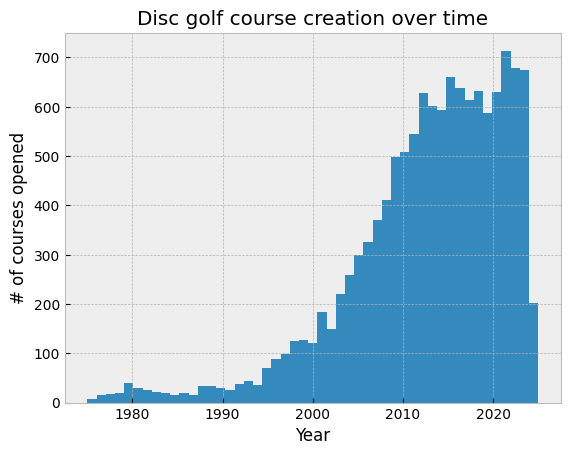

In [23]:
ax = df['year_established'].hist(bins=np.linspace(1975, 2025))
ax.set_xlabel('Year')
ax.set_ylabel('# of courses opened')
ax.set_title('Disc golf course creation over time')

plt.show()

### Search for course data

In [24]:
name = 'sellersville' # can match case insensitively
df[df['name'].str.contains('sellersville', na=False, case=False)]

,url,name,description,free,year_established,designer,tee_type,basket_type,water_in_play,basket_number,number_of_holes,sse,par,course_condition,length_metric,length_imperial,Terrain,Woods,links,is_extinct,local_directions,Rounds Recorded & Average Score,street_address,town,region,postal_code,country,latitude,longitude,ratingValue,rating_max,rating_min,rating_count,camping,pet_friendly,has_restrooms,on_ball_golf_course,cart_friendly,multiple_tees,multiple_pins
4502,https://www.dgcoursereview.com/course.php?id=4502,Sellersville DGC - Old Layout,Flat course with water in play or nearby on 7 ...,True,2011.0,Jerome von Mechow,Rubber,DISCatcher,7,9,9,"[20.4, 22.5, 23.6]","[27, 27, 27]",Good,[768],[2520],Mostly Flat,Moderately Wooded,[https://www.facebook.com/pages/Sellersville-D...,1,From Main Street in Sellersville PA at the tow...,"{'Total': '128 / 31', '#FF6600': '16 / 28', '#...",[unknown],Sellersville,Pennsylvania,18960,United States,40.363403,-75.30584,3.44,5,0,9,false,true,false,false,true,Yes,No
5525,https://www.dgcoursereview.com/course.php?id=5525,Sellersville DGC,In a beautiful town park with water in play on...,True,2011.0,Jerome von Mechow,Other,DISCatcher,13,19,19,[50.7],[57],Good,"[1472, 1757]","[4830, 5765]",Moderately Hilly,Moderately Wooded,[https://www.facebook.com/pages/Sellersville-D...,0,From Main Street in Sellersville PA at the sma...,"{'Total': '841 / 62', '#000000': '807 / 62'}",[unknown],Sellersville,Pennsylvania,18960,United States,40.359974,-75.30696,3.78,5,0,37,false,true,false,false,false,Yes,Yes


<Axes: xlabel='tee_type'>

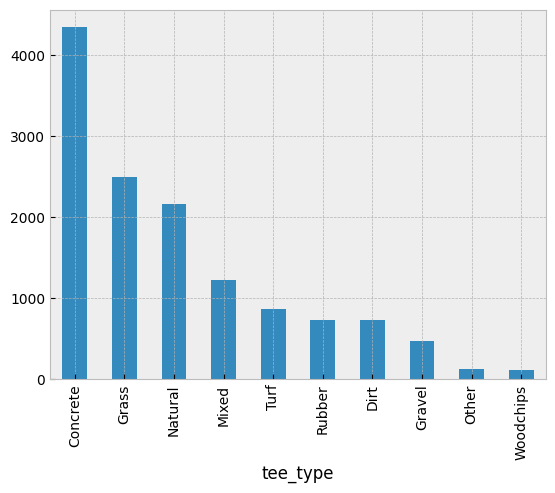

In [25]:
df['tee_type'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='basket_type'>

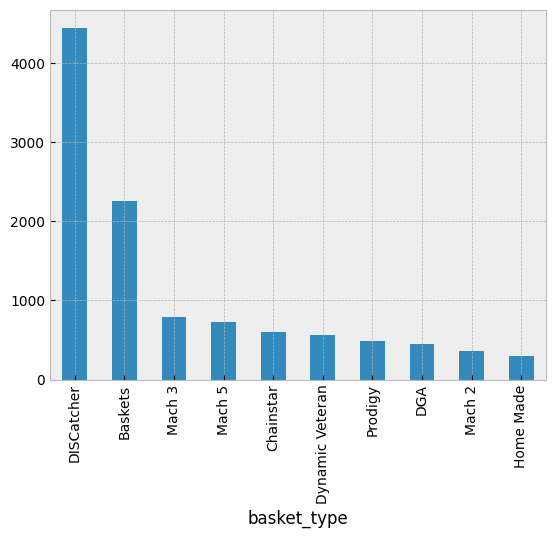

In [26]:
df['basket_type'].value_counts().head(10).plot(kind='bar')

<Axes: >

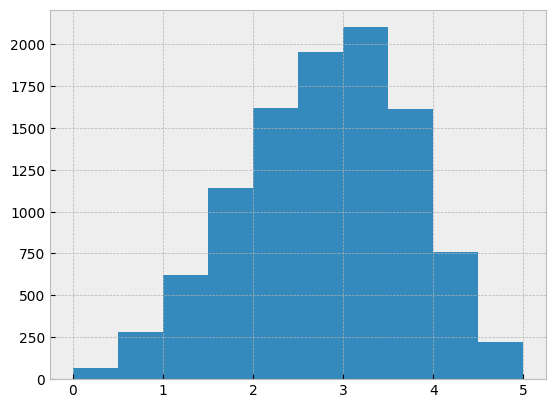

In [27]:
df['ratingValue'].hist()

## TODO
* Do something with SSE, Par lists, roundsrec avg score
* Remove '@type','disc_golf_course' columns
* Check for duplicates: df.duplicated()

# Start from loading scaped database

In [28]:
import os
import json

In [29]:
print('Available data:')
[print(f) for f in os.listdir("../data/raw") if f.endswith(".json")];

Available data:
database-2024-08-11.json


In [30]:
with open('../data/raw/database-2024-08-11.json', 'r') as f:
    data = json.load(f)

In [31]:
data['5525']

{'url': 'https://www.dgcoursereview.com/course.php?id=5525',
 'name': 'Sellersville DGC',
 'description': 'In a beautiful town park with water in play on many holes. Red practice basket has a concrete tee and works as a warm-up hole. 3 sets of tees per hole, new pavers have been laid for all primary and some alt. tees, blue and orange pavers mark the remaning alt. and tournament tee positions.',
 'isAccessibleForFree': True,
 'address': {'@type': 'PostalAddress',
  'streetAddress': '[unknown]',
  'addressLocality': 'Sellersville',
  'addressRegion': 'Pennsylvania',
  'postalCode': '18960',
  'addressCountry': 'United States'},
 'geo': {'@type': 'GeoCoordinates',
  'latitude': 40.359974,
  'longitude': -75.30696},
 'aggregateRating': {'@type': 'AggregateRating',
  'ratingValue': 3.78,
  'bestRating': 5,
  'worstRating': 0,
  'ratingCount': 37},
 'amenityFeature': [{'@type': 'LocationFeatureSpecification',
   'name': 'Disc golf course',
   'value': 'true'},
  {'@type': 'LocationFeatureSp

# Start feature engineering

In [32]:
from localroute import features

In [33]:
d2 = features.makeDataFrame(data)

In [34]:
d2.head()

,url,name,description,free,year_established,designer,tee_type,basket_type,water_in_play,basket_number,number_of_holes,sse,par,course_condition,length_metric,length_imperial,Terrain,Woods,links,is_extinct,local_directions,Rounds Recorded & Average Score,street_address,town,region,postal_code,country,latitude,longitude,ratingValue,rating_max,rating_min,rating_count,camping,pet_friendly,has_restrooms,on_ball_golf_course,cart_friendly,multiple_tees,multiple_pins
1,https://www.dgcoursereview.com/course.php?id=1,Prompton State Park,"A very scenic, mostly open course overlooking ...",True,1997,John Harvey Dave Harvey,Concrete,DISCatcher,5,18,18,"[46.8, 54.3]","[57, 67]",None,"[1787, 2460]","[5864, 8071]",Moderately Hilly,Lightly Wooded,[http://www.dcnr.state.pa.us/stateparks/findap...,0,"From I-81, take Rte. 6 east, from I-84, take R...","{'Total': '101 / 62', '#FFFF00': '77 / 60', '#...",[unknown],Honesdale,Pennsylvania,18456,United States,41.591367,-75.330167,3.95,5,0,20,true,true,false,false,true,No,Yes
2,https://www.dgcoursereview.com/course.php?id=2,Ellison Park - Old Layout,The Ellison Park Disc Golf Course is located o...,True,1989,"Royce Racinowski, Jim Palmeri &amp; Jamie Moldt",Rubber,Mach 3,None,18,18,[52.5],[57],None,[1900],[6234],Very Hilly,Moderately Wooded,"[http://www.discgolfrochester.com, http://www....",1,"From I-490 south of Rochester, exit north on H...","{'Total': '417 / 63', '#0000CC': '383 / 63'}",[unknown],Rochester,New York,14610,United States,43.153154,-77.527428,3.47,5,0,54,false,true,false,false,false,No,No
3,https://www.dgcoursereview.com/course.php?id=3,Chili DGC,Located southwest of Rochester N.Y. in the Tow...,True,1995,None,Concrete,Dynamic Veteran,6,18,18,"[43, 48.9, 55.9]","[57, 58, 58]",Perfect,"[1211, 2147]","[3973, 7045]",Mostly Flat,Lightly Wooded,"[http://www.discgolfrochester.com, http://nefa...",0,"I-490 to Exit 5, Chili Center, Rte. 386 south ...","{'Total': '789 / 70', '#0000CC': '20 / 70', '#...",400 Scottsville Chili Rd.,Chili,New York,14428,United States,43.07777,-77.766098,3.9,5,0,70,false,true,true,false,true,Yes,No
4,https://www.dgcoursereview.com/course.php?id=4,Churchville Park,Located west of Rochester N.Y. in the town of ...,True,2003,None,Rubber,DISCatcher,1,19,19,"[44, 47.3]","[65, 60]",Good,"[1344, 1614]","[4408, 5296]",Mostly Flat,Lightly Wooded,"[http://www.discgolfrochester.com, https://map...",0,Take I-490 E/W to Churchville exit (Exit 3). T...,"{'Total': '215 / 64', '#0000CC': '13 / 65', '#...",[unknown],Churchville,New York,14428,United States,43.113819,-77.883698,2.57,5,0,21,false,true,true,false,true,Yes,No
5,https://www.dgcoursereview.com/course.php?id=5,Sawyer Park,Small scenic park with creek running throughou...,True,2006,None,Dirt,DISCatcher,3,9,9,[20.5],[27],None,"[576, 642]","[1890, 2105]",Mostly Flat,Heavily Wooded,"[http://www.discgolfrochester.com, http://nefa...",0,"Rte. 490 to Rte. 390 N. Exit Vintage Ln., turn...","{'Total': '64 / 28', '#FFFFFF': '53 / 27'}",[unknown],Greece,New York,14616,United States,43.248798,-77.693089,1.98,5,0,30,false,true,false,false,true,No,No


In [35]:
d2['Rounds Recorded & Average Score'][1]

/tmp/ipykernel_42143/732644068.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d2['Rounds Recorded & Average Score'][1]


{'Total': '417 / 63', '#0000CC': '383 / 63'}

In [36]:
d2.dtypes

url                                object
name                               object
description                        object
free                               object
year_established                   object
designer                           object
tee_type                           object
basket_type                        object
water_in_play                      object
basket_number                      object
number_of_holes                    object
sse                                object
par                                object
course_condition                   object
length_metric                      object
length_imperial                    object
Terrain                            object
Woods                              object
links                              object
is_extinct                         object
local_directions                   object
Rounds Recorded & Average Score    object
street_address                     object
town                              

In [37]:
from localroute import getCourseInfo

In [38]:
getCourseInfo.get_course_info("https://www.dgcoursereview.com/course.php?id=5583")

{'url': 'https://www.dgcoursereview.com/course.php?id=5583',
 'name': 'Stafford Woods',
 'description': "13 heavily wooded, 2 small pond holes and 5 open field holes.  Designed for casual and tournament play with mixed tee pads - long tees have 12'+ pavers, short tees are mixed carpet and some paver tees (and will be all pavers as time and money allow). Multiple tee locations on 13 holes.",
 'isAccessibleForFree': True,
 'address': {'@type': 'PostalAddress',
  'streetAddress': '2201 E Evesham Rd',
  'addressLocality': 'Voorhees',
  'addressRegion': 'New Jersey',
  'postalCode': '08043',
  'addressCountry': 'United States'},
 'geo': {'@type': 'GeoCoordinates',
  'latitude': 39.861864,
  'longitude': -74.969743},
 'aggregateRating': {'@type': 'AggregateRating',
  'ratingValue': 4.25,
  'bestRating': 5,
  'worstRating': 0,
  'ratingCount': 67},
 'amenityFeature': [{'@type': 'LocationFeatureSpecification',
   'name': 'Disc golf course',
   'value': 'true'},
  {'@type': 'LocationFeatureSpec

In [39]:
df['camping'].value_counts()

camping
false    10550
true      3254
Name: count, dtype: int64